In [1]:
import litebird_sim as lbs
import numpy as np
from swipe_modules import scanning_strategy, data_directory
import matplotlib.pyplot as plt
import healpy as hp
import astropy

In [2]:
sim = lbs.Simulation(
    start_time=astropy.time.Time("2021-12-27T18:00"),
    duration_s=2*24*3600,
    description="SWIPE simulation",
)

In [3]:
jd,longitude_deg,latitude_deg,elevation_deg = np.loadtxt(
    data_directory+"/forecast_launch_LYR_5_mb_2021122718.txt",unpack=True)

In [4]:
times = astropy.time.Time(jd,format='jd')
scanning = scanning_strategy.SwipeScanningStrategy(
    balloon_latitude_deg=latitude_deg,balloon_longitude_deg=longitude_deg,balloon_time=times)

site_latitude_deg, site_longitude_deg and longitude_speed_deg_per_sec ignored
a tabulated trajectory will be used


In [5]:
sim.generate_spin2ecl_quaternions(scanning,delta_time_s=1)

In [6]:
instr = lbs.InstrumentInfo(
    name="swipe",
    spin_boresight_angle_rad=np.deg2rad(40),
)
det = lbs.DetectorInfo(name="foo", sampling_rate_hz=10)

In [7]:
obs, = sim.create_observations(detectors=[det])
pointings = lbs.get_pointings(
    obs,
    sim.spin2ecliptic_quats,
    detector_quats=[det.quat],
    bore2spin_quat=instr.bore2spin_quat,
)

In [8]:
nside = 256
npix = hp.nside2npix(nside)
h = np.zeros(npix)
for idet in [0]:
    pixidx = hp.ang2pix(nside, pointings[idet, :, 0], pointings[idet, :, 1])
    pixel_occurrences = np.bincount(pixidx)
    h[0:len(pixel_occurrences)] += pixel_occurrences

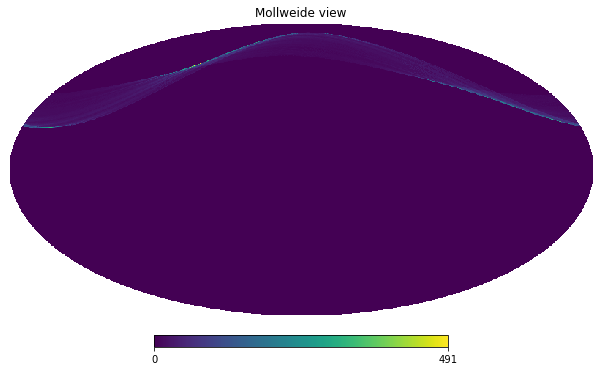

In [9]:
hp.mollview(h)